# Exploratory Data Analysis (EDA) on Bike Sales Purchase

In [1]:
#Importing python libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

Before performing EDA on the dataset, we need to import the data from the file path. To do that, we need to:
1. Upload the data into the same folder as the jupyter notebook
2. Write python code to import and read the excel file

In [2]:
#Import excel data into notebook

bike_sale_data = pd.read_excel('bike_sale.xlsx')

In [3]:
bike_sale_data.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
5,13507,M,F,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No
6,27974,S,M,160000,2,High School,Management,Yes,4,0-1 Miles,Pacific,33,Yes
7,19364,M,M,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,43,Yes
8,22155,M,M,20000,2,Partial High School,Clerical,Yes,2,5-10 Miles,Pacific,58,No
9,19280,M,M,120000,2,Partial College,Manual,Yes,1,0-1 Miles,Europe,40,Yes


### Data Cleansing

#### 1. Removing Duplicates

In [4]:
# The first is to check if data is duplicated
bike_sale_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1021     True
1022     True
1023     True
1024     True
1025     True
Length: 1026, dtype: bool

In [5]:
#Counting the total duplicates we have in the data
bike_sale_data.duplicated().sum()

26

In [6]:
#Next, we run python functions to remove the 26 duplicates we have in the data
bike_sale_data.drop_duplicates(inplace=True)

In [7]:
bike_sale_data

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,M,M,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,S,M,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,M,M,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,S,M,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


In [8]:
#Remove duplicates focusing on the primary key which is the 'ID'
bike_sale_data.drop_duplicates('ID')

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,M,M,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,S,M,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,M,M,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,S,M,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


#### 2. Replacing M;S and M;F with Married;Single and Male;Female respectively 

In [9]:
# Replacing a specific column (Marital Status). M with Married and S with Single
bike_sale_data['Marital Status'].replace(['M','S'],['Married','Single'], inplace=True)

In [10]:
# Replacing a specific column (Gender). M with Male and F with Female
bike_sale_data['Gender'].replace(['M','F'],['Male','Female'], inplace=True)

In [11]:
#print data to check if correction was implemented on data
bike_sale_data

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


#### 3. Changing income column to '0' decimal place

In [12]:
import locale
locale.setlocale(locale.LC_ALL, 'English_United States.1252' )

'English_United States.1252'

#### 4. Creating a new column for age grouping using IF function

In [13]:
# Group the age into bracket in different column with adolescent(0-30), middle age(31-54) and old(55+)using if function

def age_group(age):
    if age<=30:
        return 'Adolescent'
    elif age<=54:
        return 'Middle Age'
    else:
        return 'Old'
    
bike_sale_data['Age Bracket'] = bike_sale_data['Age'].apply(age_group)

In [14]:
bike_sale_data

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Age Bracket
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No,Middle Age
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No,Middle Age
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No,Old
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes,Middle Age
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes,Middle Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes,Middle Age
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes,Middle Age
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes,Middle Age
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No,Middle Age


## Exploratory Data Analysis

### 1. Average income of each Gender Vs bike purchase history

In [15]:
#To do this, we create the pivot table for Average Income, Gender and Purchase bike

piv1 = np.round(bike_sale_data.pivot_table(index=['Gender'],
                                  columns=['Purchased Bike'],
                                  values=['Income'],aggfunc='mean'),0)

In [16]:
piv1

Income         
Purchased Bike       No      Yes
Gender                          
Female          53440.0  55774.0
Male            56208.0  60124.0

Text(0, 0.5, 'Average Income')

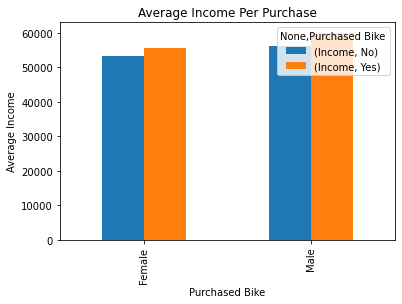

In [17]:
#Plot the relationhip between avearge income of each Gender and their bike purchase history
piv1.plot(kind='bar', figsize=(6,4))
plt.title('Average Income Per Purchase')
plt.xlabel('Purchased Bike')
plt.ylabel('Average Income')

### 2. Distance travelled by commuter and their Bike Purchase history

In [18]:
# Creating the pivot table for each Gender and their Purchase bike history
piv2 = bike_sale_data.groupby(['Commute Distance','Purchased Bike'])['Purchased Bike'].aggregate('count').unstack()

In [19]:
piv2

Purchased Bike,No,Yes
Commute Distance,,
0-1 Miles,166,200
1-2 Miles,92,77
10+ Miles,78,33
2-5 Miles,67,95
5-10 Miles,116,76


Text(0, 0.5, 'Count of Purchased Bike')

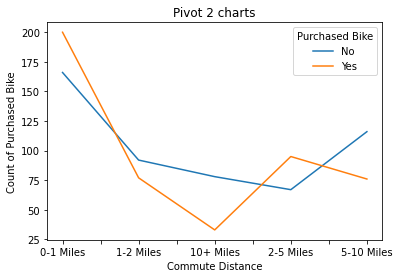

In [20]:
#Plotting relationship between Commute Distance and Bike Purchase
piv2.plot(kind='line', figsize=(6,4))
plt.title('Pivot 2 charts')
plt.xlabel('Commute Distance')
plt.ylabel('Count of Purchased Bike')

### 3. Age Bracket and their bike purchase history

In [21]:
# Creating the pivot table for Age Bracket and their Purchased bike history
piv3 = bike_sale_data.groupby(['Age Bracket','Purchased Bike'])['Purchased Bike'].aggregate('count').unstack()

In [22]:
piv3

Purchased Bike,No,Yes
Age Bracket,,
Adolescent,71,39
Middle Age,318,383
Old,130,59


Text(0, 0.5, 'Count of Purchased Bike')

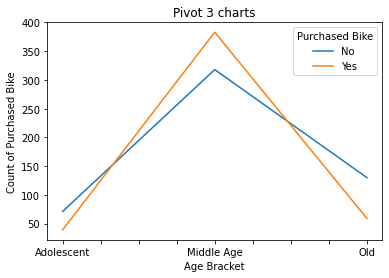

In [23]:
#Plotting relationship between Age Bracktet and Purchased bike
piv3.plot(kind='line', figsize=(6,4))
plt.title('Pivot 3 charts')
plt.xlabel('Age Bracket')
plt.ylabel('Count of Purchased Bike')

### 4. Which academic qualification earns more

<AxesSubplot:title={'center':'Qualification with highest income'}, xlabel='Education'>

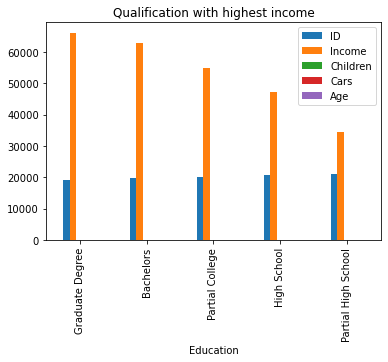

In [28]:
academic_earnings = bike_sale_data.groupby(by='Education')
academic_earnings.mean().sort_values('Income',ascending=False).head().plot(kind='bar', title='Qualification with highest income')

### Exporting Dataframe to an Excel file

After analysing the dataset it is now time to import cleaned data to excel

In [29]:
bike_sale_data.to_excel('cleaned data.xlsx', index=False)